In [38]:
#COVID-19 Forecasting for further years,months and in further countries 
#importing all the libraries & Data
import pandas as pd
from matplotlib import pyplot as plt

COVID = pd.read_csv('C:\\Users\\rohin\\Downloads\\covid19-india - Sheet1.csv')
COVID.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [24]:
COVID.head(2)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/30/2020,NaN,India,1/30/20 16:00,1,0,0
1,01/31/2020,NaN,India,1/31/2020 23:59,1,0,0


In [22]:
#is_2002 =  COVID['country']=="india"
#is_2002.unique()

array([False])

In [34]:
COVID.index
data = COVID
#JAn 30 to March 20 2020

In [35]:
from datetime import datetime
con=data['Last Update']
data['Last Update']=pd.to_datetime(data['Last Update'])
data.set_index('Last Update', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2020-01-30 16:00:00', '2020-01-31 23:59:00',
               '2020-01-31 08:15:00', '2020-02-02 06:03:08',
               '2020-02-03 21:43:02', '2020-02-03 21:43:02',
               '2020-02-03 21:43:02', '2020-02-03 21:43:02',
               '2020-02-03 21:43:02', '2020-02-03 21:43:02',
               '2020-02-03 21:43:02', '2020-02-03 21:43:02',
               '2020-02-03 21:43:02', '2020-02-03 21:43:02',
               '2020-02-13 18:53:02', '2020-02-13 18:53:02',
               '2020-02-13 18:53:02', '2020-02-16 07:43:02',
               '2020-02-16 07:43:02', '2020-02-16 07:43:02',
               '2020-02-16 07:43:02', '2020-02-16 07:43:02',
               '2020-02-16 07:43:02', '2020-02-16 07:43:02',
               '2020-02-16 07:43:02', '2020-02-16 07:43:02',
               '2020-02-16 07:43:02', '2020-02-16 07:43:02',
               '2020-02-16 07:43:02', '2020-02-16 07:43:02',
               '2020-02-16 07:43:02', '2020-02-16 07:43:02',
               '2020-03-

In [31]:
ts = COVID(['Last Update','Confirmed'])


ts



TypeError: 'DataFrame' object is not callable

In [50]:
ts = data['Confirmed'] 

ts.columns 
ts.head(10)


['value']

C:\Users\rohin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  )


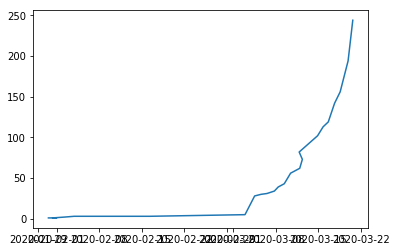

In [39]:
plt.plot(ts)


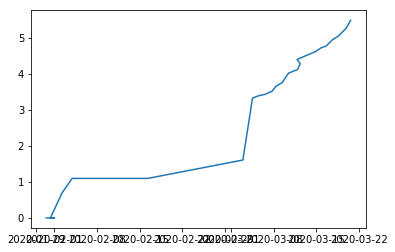

In [53]:
import numpy as np
ts_log = np.log(ts)
plt.plot(ts_log)

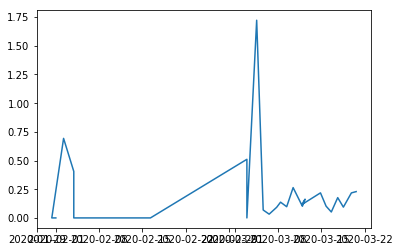

In [54]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [57]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

Text(0.5, 1.0, 'Autocorrelation Function')

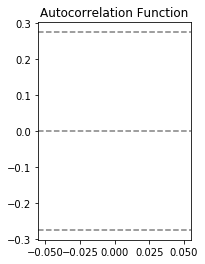

In [58]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

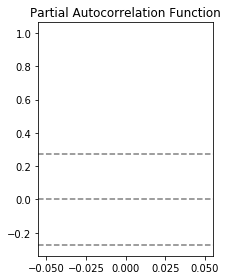

In [59]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\rohin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\rohin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

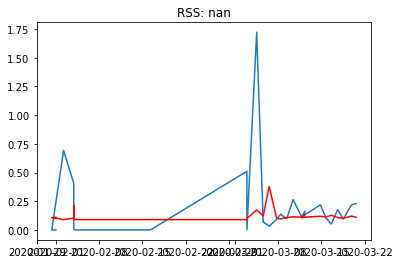

In [61]:
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\rohin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\rohin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

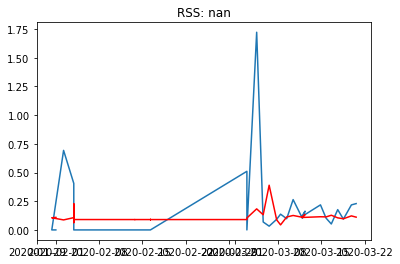

In [62]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [70]:
ts1=ts[]

Last Update
2020-01-30 16:00:00    1
2020-01-31 23:59:00    1
Name: Confirmed, dtype: int64

In [76]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Last Update
2020-01-31 23:59:00    0.109978
2020-01-31 08:15:00    0.107530
2020-02-02 06:03:08    0.089675
2020-02-03 21:43:02    0.102542
2020-02-03 21:43:02    0.212297
dtype: float64


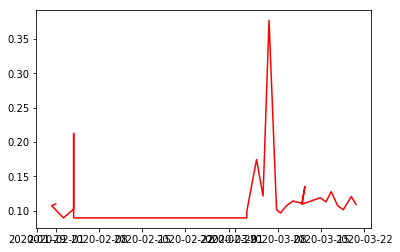

In [78]:
plt.plot(results_AR.fittedvalues, color='red')


In [82]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)


In [84]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()


In [85]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\rohin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Last Update
2020-01-30 16:00:00    0.000000
2020-01-31 08:15:00    0.217507
2020-01-31 23:59:00    0.109978
2020-02-02 06:03:08    0.307182
2020-02-03 21:43:02    0.409724
dtype: float64

Text(0.5, 1.0, 'RMSE: 81.6081')

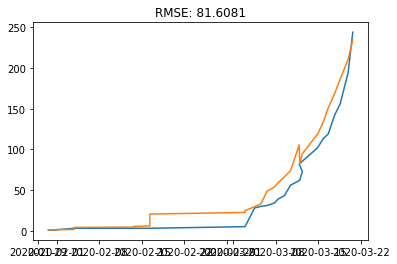

In [86]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [91]:
predictions_ARIMA.to_csv('C:\\Users\\rohin\\Downloads\\COVIDRESULTS')  

C:\Users\rohin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
